In [35]:
import pandas as pd
import seaborn as sns

df=pd.read_json("gamesET.json")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  int64  
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(2), int64(4), object(3)
memory usage: 4.1+ MB


In [37]:
df.head()

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0,True
1,22364,BRINK: Agents of Change,2011-08-03,True,False,False,Positive,85,21,2.99,2.99,0,True
2,113020,Monaco: What's Yours Is Mine,2013-04-24,True,True,True,Very Positive,92,3722,14.99,14.99,0,True
3,226560,Escape Dead Island,2014-11-18,True,False,False,Mixed,61,873,14.99,14.99,0,True
4,249050,Dungeon of the ENDLESS™,2014-10-27,True,True,False,Very Positive,88,8784,11.99,11.99,0,True


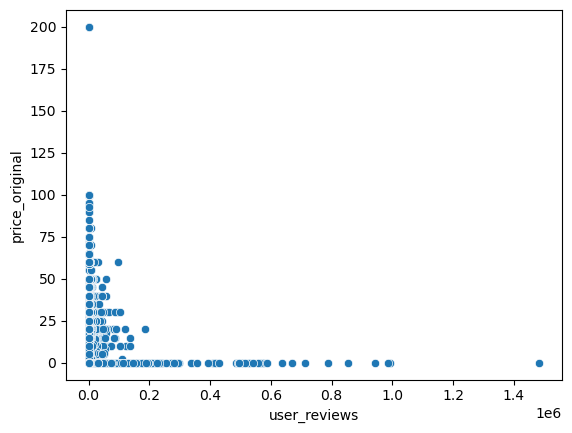

In [43]:
scatter(df=df, x='user_reviews', y='price_original', outliers=3)

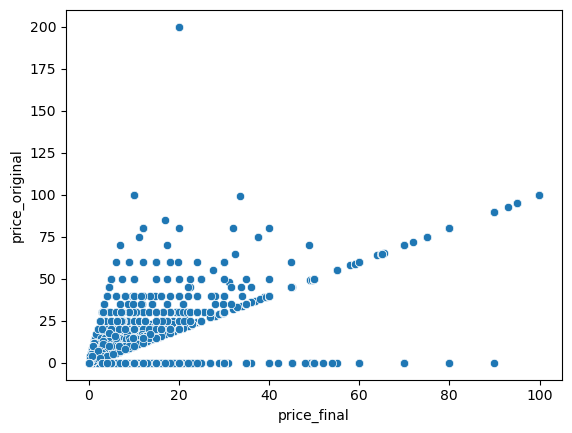

In [45]:
def scatter(df, x, y, outliers):
    idx=[]
    for i in range(outliers):
        idx=df[x].idxmax()
        df.drop([idx], inplace=True)
    sns.scatterplot(data=df, x=x, y=y)
scatter(df=df, x='price_final', y='price_original', outliers=50)

In [51]:
def calc_corr(df, x, y, num_outliers):
    if num_outliers >0:
        for count in range(num_outliers):
            idx=df[df[x]==df[x].max()].index
            for i in idx:
                df.drop([i], inplace=True)
            idx=df[df[y]==df[y].max()].index
            for i in idx:
                df.drop([i], inplace=True)
    sub_df=df[[x,y]]
    return sub_df.corr(method='pearson')

In [53]:
calc_corr(df, 'positive_ratio', 'discount', 0)

,positive_ratio,discount
positive_ratio,1.000000,0.002397
discount,0.002397,1.000000


<Axes: xlabel='user_reviews', ylabel='positive_ratio'>

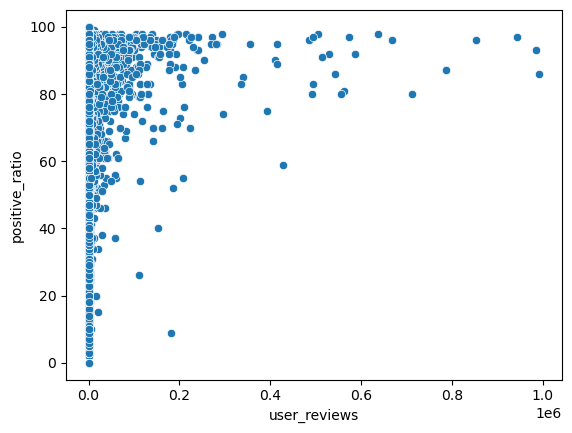

In [67]:
sns.scatterplot(data=df,x="user_reviews", y="positive_ratio")

In [57]:
df["user_reviews"].max()

1484122

In [59]:
df[df["user_reviews"]==1484122]

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
12717,271590,Grand Theft Auto V,2015-04-13,True,False,False,Very Positive,86,1484122,0.0,0.0,0,True


In [61]:
dfCleaned = df.drop([12717], inplace=True)

<Axes: xlabel='positive_ratio', ylabel='user_reviews'>

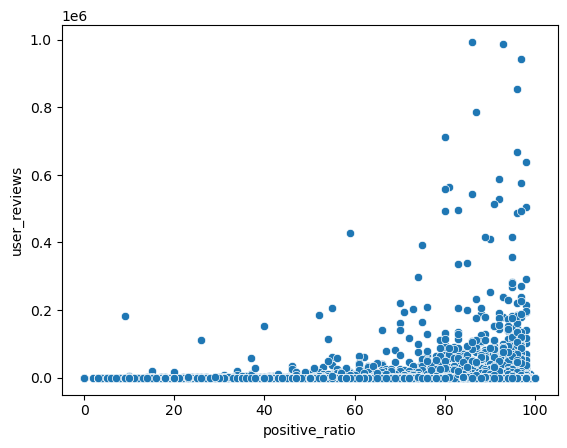

In [63]:
sns.scatterplot(data=df,x="positive_ratio", y="user_reviews")

In [65]:
subDF = df[["positive_ratio", "user_reviews"]]
subDF.corr(method="pearson")

,positive_ratio,user_reviews
positive_ratio,1.000000,0.046478
user_reviews,0.046478,1.000000
